In [1]:
import pandas as pd
import glob,re

In [2]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
baseRepName="/Users/gilles/Box Sync/2015-Data/"
repName=baseRepName+"DerivationParadigmes/"

In [4]:
def arrondi(n):
   return int(round(n,0)) 

In [47]:
def getPoint(df):
    df.drop('None', axis=1, inplace=True)
    df.drop(df.index[[0,1]],inplace=True)
    s=df.apply(pd.to_numeric).stack()
    mean=arrondi(s.mean())
    median=arrondi(s.median())
    q1=arrondi(s.quantile(0.25))
    q3=arrondi(s.quantile(0.75))
    return [mean, median, q1,q3]

In [48]:
def getTokensForms(nomFichier):
    m=re.search(ur"-T(\d+)-",nomFichier)
    if m:
        nbTokens=int(m.group(1))
    else:
        print "pas de nombre de Tokens dans le nom de fichier"
        nbTokens=pd.NaT
    m=re.search(ur"-F(\d+)-",nomFichier)
    if m:
        nbForms=int(m.group(1))
    else:
        print "pas de nombre de Tokens dans le nom de fichier"
        nbForms=pd.NaT
    return [nbTokens,nbForms]

In [49]:
def getData(serie,rep=repName):
    data={}
    for numMSP,msp in enumerate(glob.glob(rep+"*%s.csv"%serie)):
        dataLine=getTokensForms(msp)
        pdMSP=pd.read_csv(filepath_or_buffer=msp,sep=";")
        dataLine.extend(getPoint(pdMSP))
        data[int((numMSP+1))]=dataLine
    return data

In [50]:
def getSerie(serie):
    serieInitial=serie[0]
    parSerie=pd.DataFrame.from_dict(getData(serie),orient="index",dtype=int).sort_index()
    parSerie.columns=["tokens","forms"+serieInitial,"mean"+serieInitial,"median"+serieInitial,"Q1"+serieInitial,"Q3"+serieInitial]
    parSerie.set_index("tokens",inplace=True)
    return parSerie

In [51]:
parOMP=getSerie("Groupe")
parMSP=getSerie("Separe")

In [52]:
parMSP

,formsS,meanS,medianS,Q1S,Q3S
tokens,,,,,
1000,677,2,1,0,2
2000,1193,3,1,0,3
3000,1642,5,2,1,5
4000,2060,7,3,1,7
5000,2447,8,4,1,8
6000,2805,9,4,1,10
7000,3152,11,5,2,11
8000,3464,13,6,2,13
9000,3781,14,6,3,15


In [62]:
parCOMP=parMSP.join(parOMP)
parCOMP.drop("formsG",axis=1,inplace=True)
parCOMP.columns=["Forms","mean MSP","median MSP","Q1 MSP","Q3 MSP","mean OMP","median OMP","Q1 OMP","Q3 OMP"]

(<matplotlib.axes._subplots.AxesSubplot at 0x118843090>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11e158850>)

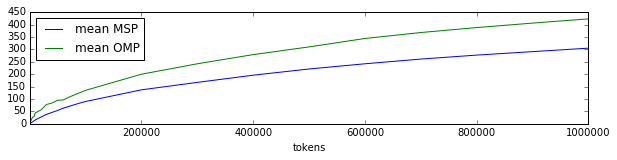

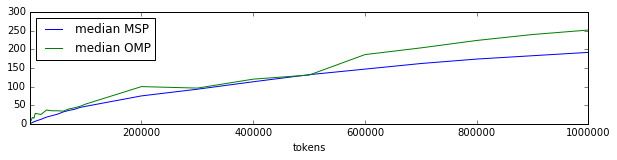

In [77]:
parCOMP[0:28][["mean MSP","mean OMP"]].plot(figsize=(10,2),logx=False),parCOMP[0:28][["median MSP","median OMP"]].plot(figsize=(10,2))

(<matplotlib.axes._subplots.AxesSubplot at 0x119ddbed0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a4818d0>)

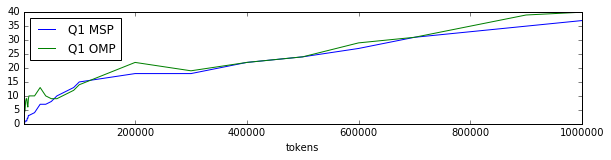

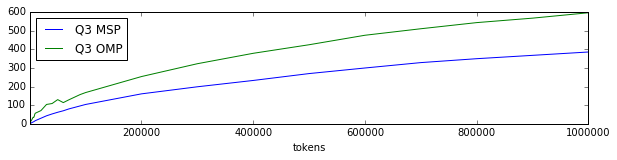

In [67]:
parCOMP[0:28][["Q1 MSP","Q1 OMP"]].plot(figsize=(10,2)),parCOMP[0:28][["Q3 MSP","Q3 OMP"]].plot(figsize=(10,2))

(<matplotlib.axes._subplots.AxesSubplot at 0x1187bdd10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a230e90>)

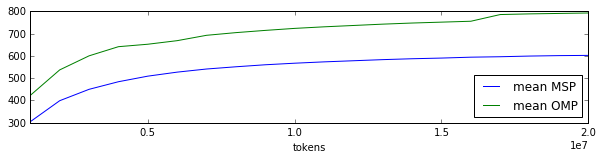

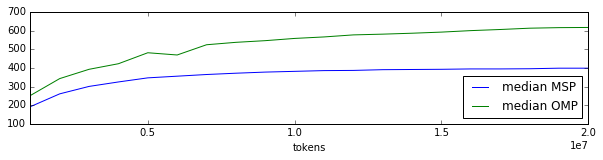

In [66]:
parCOMP[27:][["mean MSP","mean OMP"]].plot(figsize=(10,2)),parCOMP[27:][["median MSP","median OMP"]].plot(figsize=(10,2))

(<matplotlib.axes._subplots.AxesSubplot at 0x11a051310>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11c606cd0>)

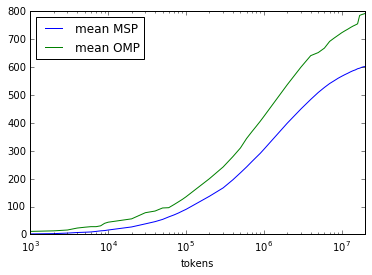

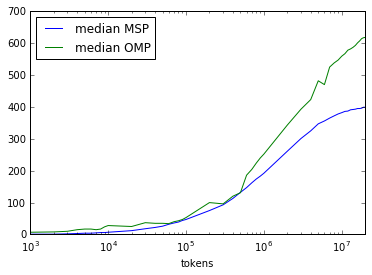

In [70]:
parCOMP[["mean MSP", "mean OMP"]].plot(logx=True),parCOMP[["median MSP", "median OMP"]].plot(logx=True)